In [1]:
import pandas as pd

In [2]:
def missing(df):
    """
    Calculate the missing values and percentage of each column while preserving the column's data type
    """
    # Sum the missing values in each column and sort them in descending order.
    missing_number = df.isnull().sum().sort_values(ascending=False)
    # Percentage of missing values per column
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    # The data type of each column
    dtypes = df.dtypes
    # Merge into a DataFrame
    missing_values = pd.concat([missing_number, missing_percent, dtypes], axis=1, keys=['Missing_Number', 'Missing_Percent', 'Data_Type'])
    return missing_values[missing_values['Missing_Percent'] > 0]

In [3]:
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customerid_data = pd.read_csv('Customer_ID.csv')
transactionid_data = pd.read_csv('Transaction_ID.csv')


In [4]:
#Calculate each dataset missing value and percentage
missing(cab_data)

,Missing_Number,Missing_Percent,Data_Type


In [5]:
missing(city_data)

,Missing_Number,Missing_Percent,Data_Type


In [6]:
missing(customerid_data)

,Missing_Number,Missing_Percent,Data_Type


In [7]:
missing(transactionid_data)

,Missing_Number,Missing_Percent,Data_Type


In [8]:
# Merge dataframes into final cab data
merged_df1 = pd.merge(cab_data, city_data, on='City')
merged_df2 = pd.merge(merged_df1, transactionid_data, on='Transaction ID')
final_data = pd.merge(merged_df2, customerid_data, on='Customer ID')

In [9]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Population          359392 non-null  object 
 8   Users               359392 non-null  object 
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 38.4+ MB
None


In [10]:
# Distinguish between continuous data, ordered categorical data, unordered categorical data (binary variables, multicategorical variables)
numeric_columns = ['KM Travelled','Price Charged','Cost of Trip','Population,','Users','Income (USD/Month)']
ordinal_categorical = ['Date of Travel','Age']
binary_categorical = ['Company','Payment_Mode','Gender']
multiclass_categorical = ['Transaction ID','City','Customer ID']

# Data Exploration

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Consumer demographics of different brands

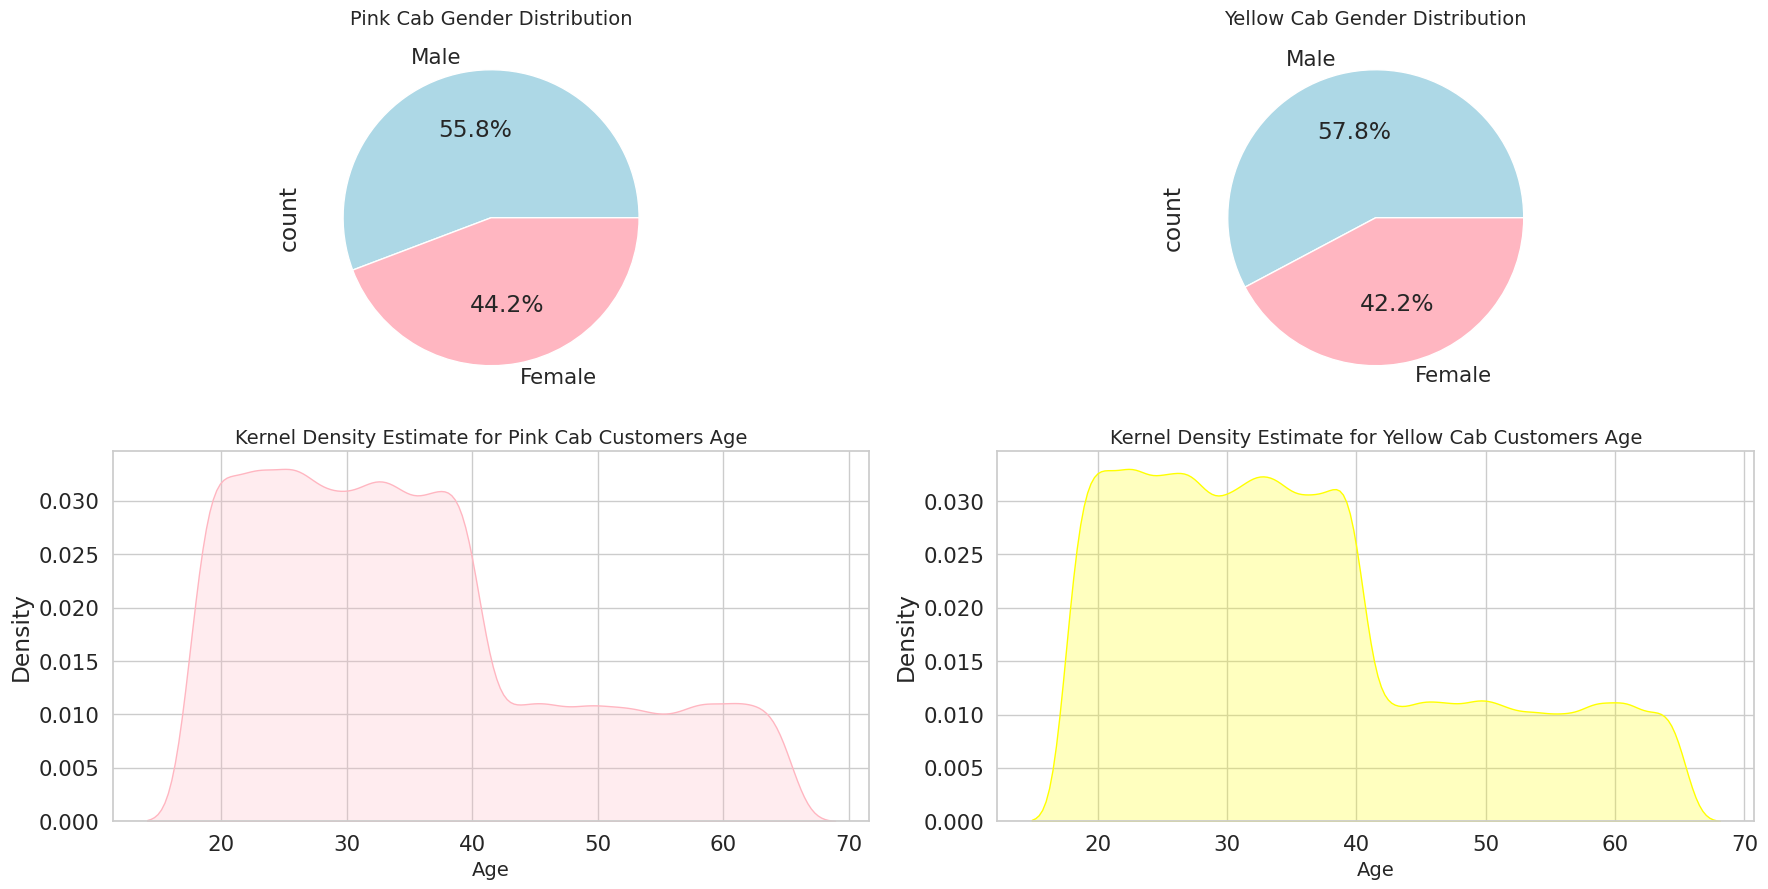

In [14]:
# 设置图形风格并设置字体大小
sns.set(style="whitegrid", font_scale=1.4)

# 创建一个大的图形
plt.figure(figsize=(18, 10))

# Filter data for each company
pink_cab = final_data[final_data['Company'] == 'Pink Cab']
yellow_cab = final_data[final_data['Company'] == 'Yellow Cab']

# pie chart ('Gender')
plt.subplot(2, 2, 1)
pink_cab['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Pink Cab Gender Distribution', fontsize=14)

plt.subplot(2, 2, 2)
yellow_cab['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Yellow Cab Gender Distribution', fontsize=14)

# Kernel density estimation ('Age')
plt.subplot(2, 2, 3)
sns.kdeplot(pink_cab['Age'], fill=True, color='lightpink')
plt.title('Kernel Density Estimate for Pink Cab Customers Age', fontsize=14)
plt.xlabel('Age', fontsize=14)

plt.subplot(2, 2, 4)
sns.kdeplot(yellow_cab['Age'], fill=True, color='yellow')
plt.title('Kernel Density Estimate for Yellow Cab Customers Age', fontsize=14)
plt.xlabel('Age', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()